<a href="https://colab.research.google.com/github/afonsosr2/alura_datavis/blob/main/Alura%2B_Tipos_de_Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de Visualização de Dados
---

## Análise dos Microdados do Enem (2010 - 2017)

> Região Nordeste (9 estados)
- Ano
- Unidade Federal (prova)
- Idade
- Situação de Conclusão
- Tipo de língua
- Notas (Ciências da Natureza, Ciências Humanas, Linguagens, Matemática e Redação)


### Importando as bibliotecas e carregando o arquivo

In [ ]:
# Importando as bibliotecas para manipulação e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

# Carregando o arquivo dos microdados no ambiente como um Dataframe
enem = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/alura_datavis/main/enem_nordeste_2010_2017.csv")

enem.head()

,ANO,UF_PROVA,IDADE,SITUACAO_CONCLUSAO,TIPO_LINGUA,NOTA_CIENCIAS_NATUREZA,NOTA_CIENCIAS_HUMANAS,NOTA_LINGUAGENS_CODIGOS,NOTA_MATEMATICA,NOTA_REDACAO
0,2010,PE,17.0,Concluirá no Ano,Inglês,612.3,701.5,591.1,679.4,700.0
1,2010,BA,38.0,Concluído,Espanhol,NaN,NaN,NaN,NaN,0.0
2,2010,MA,23.0,Concluído,Inglês,541.0,631.2,593.9,511.2,950.0
3,2010,CE,34.0,Concluído,Espanhol,NaN,NaN,NaN,NaN,0.0
4,2010,BA,20.0,Concluído,Inglês,NaN,NaN,NaN,NaN,0.0


## Tipos de Visualização

Para escolhermos o tipo de visualização de nossos dados precisamos, nos perguntar primeiro **como** queremos representá-los e **o que** queremos informar ao nosso público.

Na imagem abaixo, apresentamos um diagrama com diversos tipos de **visualização de dados** (criado por [Andrew Abela](https://extremepresentation.com/wp-content/uploads/choosing-a-good-chart-09-1.pdf)) em que é possível perceber que os gráficos mais comuns podem ser dividos em **4 subgrupos**:

- Comparação
- Distribuição
- Relacionamento
- Composição

<img src="https://i.imgur.com/u77CgCq.png" alt="inserir alt" height="720" width="900">

<font size=2>Fonte: Andrew Abela (Extreme Presentation/Biuwer)</font>

### <font color=#E6ae1d size=5>Comparação 📊</font>


---


É amplamente utilizado quando queremos **comparar diferentes valores e atributos** dentro dos dados, uns com os outros.

O tipo pode variar dependendo dos dados. Por exemplo:

- Os nossos dados possuem uma variável temporal?
 - Quantos períodos de tempo possuímos?
- Quantas variáveis e categorias os nossos dados apresentam?

<font color=green> Visualizações mais comuns: </font> Gráficos de colunas, barras e linhas


#### Gráfico de Barras

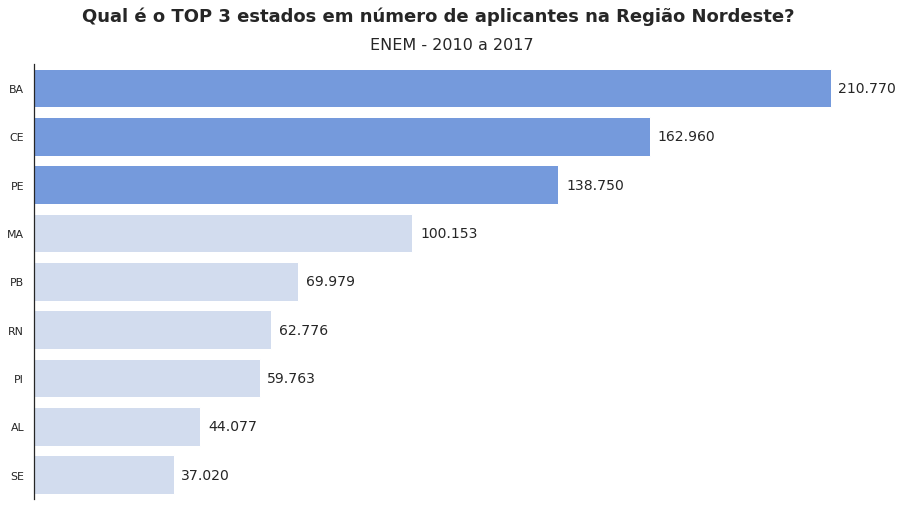

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Área da visualização e ocultar as bordas do gráfico exceto a do lado esquerdo
plt.figure(figsize=(15, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "axes.spines.bottom": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Destacando o TOP 3 estados com maior quantidade de aplicantes
estados = enem["UF_PROVA"].value_counts().index
top_3 = estados[:3]
cores = ["#6495ed" if (estado in top_3) else "#cddbf3" for estado in estados]

# Plotando o gráfico de barras e ocultando os pontos do eixo X
ax = sns.countplot(data = enem, y = "UF_PROVA", order = enem["UF_PROVA"].value_counts().index, palette = cores)
ax.set_xticklabels([])

# Adicionando título e subtítulo no gráfico e ocultando as labels de cada eixo
plt.suptitle("Qual é o TOP 3 estados em número de aplicantes na Região Nordeste?", size = 18, weight='bold')
plt.title("ENEM - 2010 a 2017", fontsize = 16, pad = 15)
plt.ylabel("")
plt.xlabel("")

# Escrevendo os valores de cada barra (eixo X) no gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 2000
  quantidade = f'{pos_x:,.0f}'.replace(',','.')
  ax.text(x = pos_x + offset , y = pos_y, s = quantidade, va='center', fontsize=14)

<font color=green size=4> Observações e hipóteses: </font>

---

Podemos facilmente observar a quantidade de aplicantes do Enem relativo a cada estado no período de 2010 a 2017. Além disso, podemos apontar a **Bahia, Ceará e Pernambuco** como o **TOP 3** estados com mais aplicantes.

Seria interessante traçar um paralelo com a população de cada estado ou com o número de estudantes nesses dados estados através de fontes externas, como a do IBGE.

#### Gráfico de Colunas

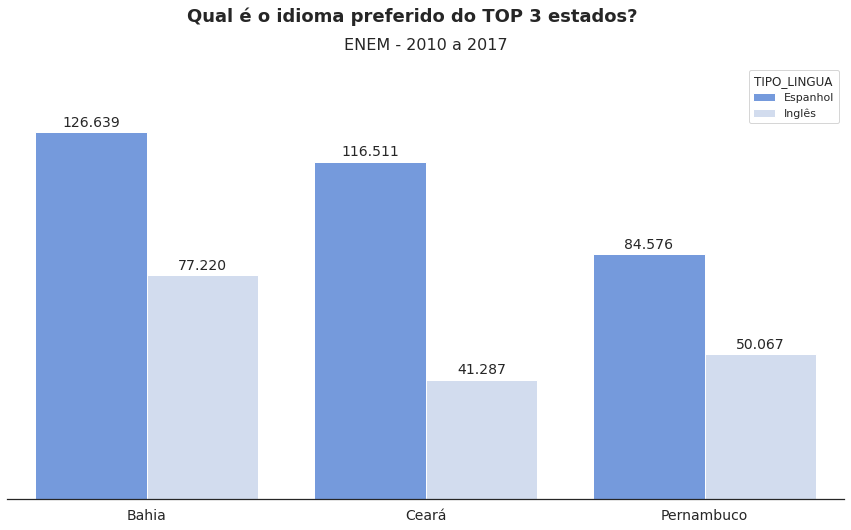

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Área da visualização e ocultar as bordas do gráfico exceto a do eixo X
plt.figure(figsize=(15, 8))
custom_params = {"axes.spines.right": False,"axes.spines.left": False,
                 "axes.spines.top": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Ajustando a identidade visual dos gráficos
cores = ["#6495ed","#cddbf3"]

# Selecionando apenas os 3 estados com o maior número de aplicantes e eliminando
# os casos que apresentam de maneira inconclusiva o tipo de língua (".")
top_3 = ["BA", "CE", "PE"]
enem_top3_linguas = enem[-(enem["TIPO_LINGUA"] == ".")].query("UF_PROVA == @top_3")

# Plotando o gráfico de colunas, ocultando os pontos do eixo Y e definindo as
# variáveis categóricas do eixo X (estados)
ax = sns.countplot(data = enem_top3_linguas.sort_values("UF_PROVA"), x = "UF_PROVA",
                   hue= "TIPO_LINGUA", hue_order = ["Espanhol","Inglês"], palette = cores)
ax.set_yticklabels([])
ax.set_xticklabels(["Bahia", "Ceará", "Pernambuco"], fontsize = 14)

# Adicionando título e subtítulo no gráfico e ocultando as labels de cada eixo
plt.suptitle("Qual é o idioma preferido do TOP 3 estados?", size = 18, weight='bold')
plt.title("ENEM - 2010 a 2017", fontsize = 16, pad = 15)
plt.ylabel("")
plt.xlabel("")

# Descrevendo o limite mínimo e máximo do eixo Y
plt.ylim(0, 150000)

# Escrevendo os valores de cada coluna (eixo Y) no gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_x() + barra.get_width() / 2
  pos_y = barra.get_height()
  offset = 2000
  quantidade = f'{pos_y:,.0f}'.replace(',','.')
  ax.text(x = pos_x, y = pos_y + offset, s = quantidade, ha='center', fontsize=14)

<font color=green size=4> Observações e hipóteses: </font>

---

Após apresentarmos os estados da **Bahia, Ceará e Pernambuco** como o **TOP 3** estados com mais aplicantes, é possível, através do gráfico de colunas, verificar a quantidade aplicantes de acordo com a escolha de idioma estrangeiro (Espanhol e Inglês) em cada estado.

Podemos observar que os três estados possuem a **língua espanhola** como a **escolha preferida** das(os) aplicantes. O estado do **Ceará** apresenta a maior proporção entre as duas línguas (aproximadamente **74%** e **26%**, para a língua espanhola e inglesa respectivamente).

#### Gráfico de linhas

In [ ]:
# Retirando as notas NaN do subset das Notas de Ciências Humanas
enem_ch = enem.dropna(subset=["NOTA_CIENCIAS_HUMANAS"])

# Selecionado as colunas relevantes para análise e apenas as notas das provas
# realizadas na Bahia
colunas = ["ANO", "UF_PROVA", "NOTA_CIENCIAS_HUMANAS"]
enen_ch_BA = enem_ch[colunas].query("UF_PROVA == 'BA'")

# Agregando as notas e calculando a média da matéria pro ano
enen_ch_BA = enen_ch_BA.groupby(["ANO"]).aggregate("mean")

# Ajustando o DataFrame para apresentar a variável ANO como coluna e não index
enen_ch_BA = enen_ch_BA.reset_index()

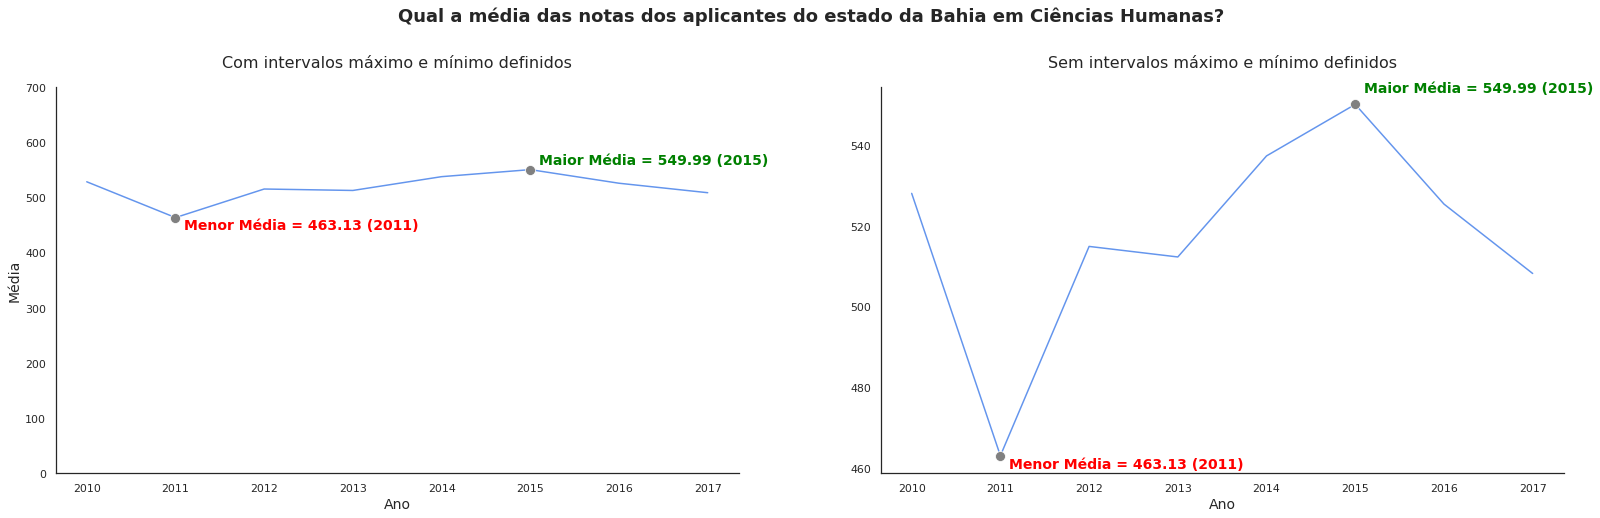

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Área da visualização e ocultar as bordas do gráfico exceto as do Eixo X e Y
plt.figure(1, figsize=(24, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Ajustando a identidade visual dos gráficos
sns.set_palette("light:#6495ed_r")

# Criando variáveis que guardam a nota mínima, máxima, o array com todas as notas por ano
# e os pontos a serem destacados pelo marcador
nota_min = min(enen_ch_BA["NOTA_CIENCIAS_HUMANAS"])
nota_max = max(enen_ch_BA["NOTA_CIENCIAS_HUMANAS"])
valores = enen_ch_BA["NOTA_CIENCIAS_HUMANAS"].values
pontos_a_marcar = list((valores == nota_min) | (valores == nota_max))

# Adicionando título no gráfico
plt.suptitle("Qual a média das notas dos aplicantes do estado da Bahia em Ciências Humanas?", size = 18, weight='bold')

## GRÁFICO 01 - DESCREVENDO O INTERVALO MÍNIMO E MÁXIMO DE Y

# Definindo o gráfico 01
plt.subplot(121)

# Plotando o gráfico de linha e selecionando os pontos de máximo e mínimo
ax = sns.lineplot(data = enen_ch_BA, x = "ANO", y = "NOTA_CIENCIAS_HUMANAS",
                  marker ="o", markersize = 10, markerfacecolor = "grey",
                  markevery = pontos_a_marcar)

# Adicionando subtítulo no gráfico e ocultando as labels de cada eixo
plt.title("Com intervalos máximo e mínimo definidos", fontsize = 16, pad = 20)
plt.ylabel("Média", fontsize = 14)
plt.xlabel("Ano", fontsize = 14)

# Adicionando o texto para a maior e a menor média e o ano em que ocorreram
for x, y in zip(enen_ch_BA["ANO"], enen_ch_BA["NOTA_CIENCIAS_HUMANAS"]):
  if y == max(enen_ch_BA["NOTA_CIENCIAS_HUMANAS"]):
    ax.text(x = x + 0.1, y = y + 10, s = f"Maior Média = {y:.2f} ({x:})", color = "green",
           weight = "bold", fontsize = 14)
  if y == min(enen_ch_BA["NOTA_CIENCIAS_HUMANAS"]):
    ax.text(x = x + 0.1, y = y - 20, s = f"Menor Média = {y:.2f} ({x:})", color = "red",
           weight = "bold", fontsize = 14)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 700)

## GRÁFICO 02 - SEM DESCREVER O INTERVALO MÍNIMO E MÁXIMO

# Definindo o gráfico 02
plt.subplot(122)

# Plotando o gráfico de linha e selecionando os pontos de máximo e mínimo
ax = sns.lineplot(data = enen_ch_BA, x = "ANO", y = "NOTA_CIENCIAS_HUMANAS",
                  marker ="o", markersize = 10, markerfacecolor = "grey",
                  markevery = pontos_a_marcar)

# Adicionando subtítulo no gráfico e ocultando as labels de cada eixo
plt.title("Sem intervalos máximo e mínimo definidos", fontsize = 16, pad = 20)
plt.ylabel("")
plt.xlabel("Ano", fontsize = 14)

# Adicionando o texto para a maior e a menor média e o ano em que ocorreram
for x, y in zip(enen_ch_BA["ANO"], enen_ch_BA["NOTA_CIENCIAS_HUMANAS"]):
  if y == max(enen_ch_BA["NOTA_CIENCIAS_HUMANAS"]):
    ax.text(x = x + 0.1, y = y + 3, s = f"Maior Média = {y:.2f} ({x:})", color = "green",
           weight = "bold", fontsize = 14)
  if y == min(enen_ch_BA["NOTA_CIENCIAS_HUMANAS"]):
    ax.text(x = x + 0.1, y = y - 3, s = f"Menor Média = {y:.2f} ({x:})", color = "red",
           weight = "bold", fontsize = 14)

# Inserindo um espaço entre gráficos
plt.tight_layout(pad=5)

# Exibindo os gráficos
plt.show()



<font color=red size=5> ⚠ CUIDADO! ⚠</font>






> Muitas ferramentas tentam ajustar os dados de **máximo** e **mínimo** para aproveitar o máximo da área escolhida para o desenho do gráfico.
>
> Em muitos casos, esse tipo de comportamento pode nos levar a uma interpretação equivocada de nossos dados, fazendo com que eles pareçam mais discreptantes do que realmente são.

<font color=green size=4> Observações e hipóteses: </font>

---
O gráfico de linhas apresenta as médias de Ciências Humanas no estado da Bahia.

Podemos destacar dois pontos importantes para analisar a evolução das médias pelos anos: a **menor média** registrada é de **463,13** no ano de 2011 e a **maior média** é de **549,99** no ano de 2015. A diferença entre as duas médias é de aproximadamente **87 pontos**.

Vale a pena verificar se esse comportamento é semelhante ao de outros estados ou um caso particular desse estado.




---



### <font color=#4b6cd4 size=5>Distribuição 🧮</font>


---



É utilizado quando queremos entender **como as observações individuais são distribuídas** dentro de nosso conjunto de dados.

O tipo pode variar dependendo dos dados. Por exemplo:
- Quantas variáveis estou representando?
- Possuo muitas ou poucas observações?

<font color=green> Visualizações mais comuns: </font> histogramas de colunas e linhas e gráficos de dispersão.

#### Histograma de barras

In [ ]:
# Retirando as idades NaN da coluna IDADE
enem_idade =  enem["IDADE"].dropna()

# Selecionado o intervalo das idades das(os) aplicantes de 15 a 60 anos
selecao = (enem_idade >= 15) & (enem_idade <= 60)
enem_idade = enem_idade[selecao]

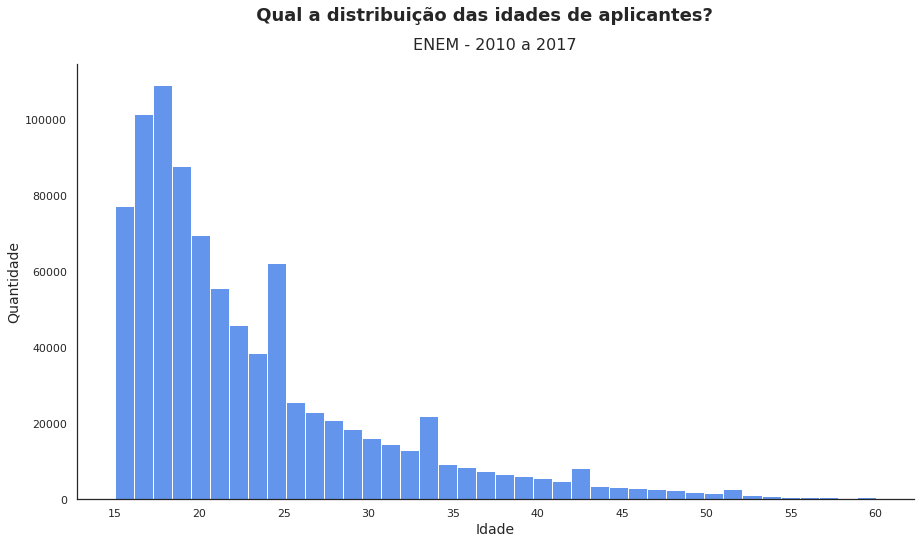

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Área da visualização e ocultar as bordas do gráfico exceto os eixos X e Y
plt.figure(figsize=(15, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Ajustando a identidade visual dos gráficos
sns.set_palette("light:#6495ed_r")

# Plotando o histograma de colunas e ajustando os pontos do eixo X
ax = plt.hist(x = enem_idade, bins = 40)
plt.xticks(list(np.arange(15, 65, step=5)))

# Adicionando título e subtítulo em nosso gráfico e o nome das labels
plt.suptitle(" Qual a distribuição das idades de aplicantes?", size = 18, weight='bold')
plt.title("ENEM - 2010 a 2017", fontsize = 16, pad = 15)
plt.ylabel("Quantidade", fontsize = 14)
plt.xlabel("Idade", fontsize = 14)

# Oculta as informações no topo do gráfico
plt.show()

<font color=green size=4> Observações e hipóteses: </font>

---
O **Enem** é um exame de avaliação da aprendizagem de estudantes do **Ensino Médio** de todo Brasil, mas também é uma ferramenta importante para quem visa o acesso às universidades e faculdades de todo o país. Por isso, é esperado que uma grande parte dos aplicantes esteja entre as idades de **15 a 20 anos**.

O histograma aponta essa situação, mas podemos também sugerir uma atenção aos(às) estudantes **por volta dos 25 anos**. Uma das hipóteses é a de aplicantes buscando uma possibilidade de acesso à uma segunda graduação ou uma mudança de carreira seguida da tentativa de alteração do tipo de curso que desejam estudar.



---



### <font color=#da5459 size=5>Relacionamento 🔀</font>


---



É indicado quando estamos interessados em saber **como os valores e atributos estão se relacionando entre si**.

Para esse tipo, os **gráficos de dispersão** geralmente são usados quando traçamos a relação entre **duas variáveis**, e os **gráficos de bolhas** quando **três variáveis** estão envolvidas.

<font color=green> Visualizações mais comuns: </font> Gráficos de dispersão e gráficos de bolhas

#### Gráfico de Dispersão (Scatter plot)

In [ ]:
# Retirando as notas NaN das colunas das notas de Matemática e Ciências da Natureza
enem_mat_cn = enem[["NOTA_MATEMATICA","NOTA_CIENCIAS_NATUREZA"]].dropna()

# Selecionando todas as notas de Matemática e Ciências da Natureza exceto as de valor 0
enem_mat_cn = enem_mat_cn.query("NOTA_MATEMATICA != 0 & NOTA_CIENCIAS_NATUREZA != 0").reset_index(drop = True)



<font color=red size=5> ⚠ CUIDADO! ⚠</font>




> O **gráfico de dispersão** (Scatter Plot) é usado para verificar se existe uma **relação entre duas variáveis numéricas**.
>
> Isso não significa que uma variável causa efeito na outra, mas apenas se existe uma relação e qual intensidade entre essa relação. A relação entre duas variáveis pode ser **positiva**, **negativa** ou **neutra**, **linear** ou **não linear**.


> Outra atenção que devemos ter é em relação ao **overplotting**.
>
>De forma resumida, o overplotting é quando os **dados ou labels em uma visualização de dados se sobrepõem**, tornando difícil de notar cada observação dos dados individualmente em uma visualização de dados. Ele normalmente acontece quando temos um **grande número de observações** ou um **número restrito de valores únicos** em nosso dataset.

In [ ]:
# Selecionando uma amostra aleatória de 1000 notas do nosso DataFrame, para evitar o overplotting
enem_mat_cn = enem_mat_cn.sample(n=1000)

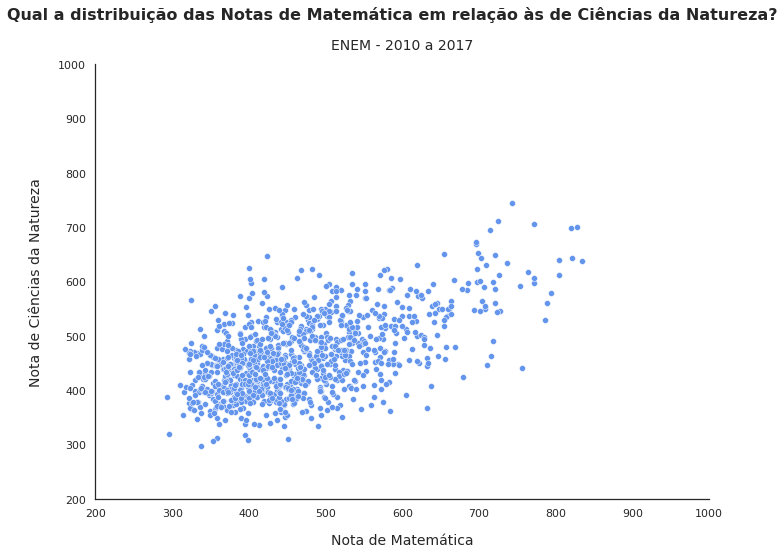

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Área da visualização e ocultar as bordas do gráfico exceto os eixos X e Y
plt.figure(figsize=(11, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Ajustando a identidade visual dos gráficos
sns.set_palette("light:#6495ed_r")

# Plotando o gráfico de dispersão com a amostra de pontos escolhidos aleatoriamente
ax = sns.scatterplot(data = enem_mat_cn, x = "NOTA_MATEMATICA", y = "NOTA_CIENCIAS_NATUREZA")

# Adicionando título e subtítulo em nosso gráfico e o nome dos labels
plt.suptitle("Qual a distribuição das Notas de Matemática em relação às de Ciências da Natureza?", size = 16, weight='bold')
plt.title("ENEM - 2010 a 2017", fontsize = 14, pad = 15)
plt.ylabel("Nota de Ciências da Natureza", fontsize = 14, labelpad = 15)
plt.xlabel("Nota de Matemática", fontsize = 14, labelpad = 15)

# Descrevendo o limite mínimo e máximo do eixo x e y
plt.xticks(list(np.arange(200, 1100, step=100)))
plt.yticks(list(np.arange(200, 1100, step=100)))

# Oculta as informações no topo do gráfico
plt.show()

<font color=green size=4> Observações e hipóteses: </font>

---

Se observarmos o gráfico de dispersão das notas de **Matemática** e **Ciências da Natureza**, podemos notar certa semelhança entre elas. Quando a nota de Matemática **aumenta**, a nota de Ciências tende a **subir**, e quando a nota de Matemática **diminui**, a nota de Ciências tende a **cair**.

Logo, podemos inferir que a relação entre as variáveis é **positiva**.

#### Gráfico de Bolhas

In [ ]:
# Retirando as notas NaN das colunas das selecionadas
colunas = ["UF_PROVA", "IDADE", "NOTA_MATEMATICA","NOTA_LINGUAGENS_CODIGOS", "NOTA_REDACAO"]
enem_mat_pt_red = enem[colunas].dropna()

# Selecionando todas as notas de Matemática, Linguagens e Códigos e Redação exceto as de valor 0
enem_mat_pt_red = enem_mat_pt_red.query("NOTA_MATEMATICA != 0 & NOTA_LINGUAGENS_CODIGOS != 0 & NOTA_REDACAO != 0").reset_index(drop = True)

# Agrupando os dados por estado e idade dos aplicantes
enem_mat_pt_red = enem_mat_pt_red.groupby(["UF_PROVA", "IDADE"]).aggregate("mean")

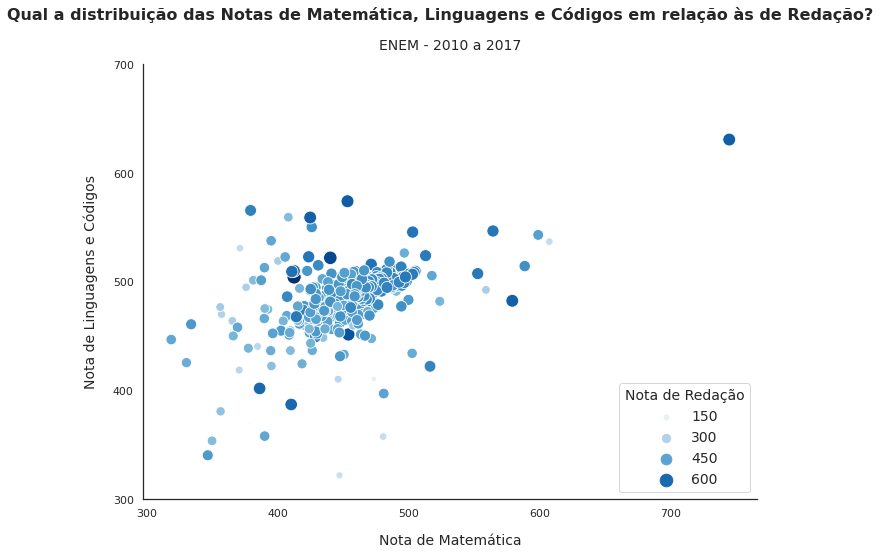

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Área da visualização e ocultar as bordas do gráfico exceto os eixos X e Y
plt.figure(figsize=(11, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Plotando o gráfico de bolhas com as notas de redação como o tamanho das bolhas
ax = sns.scatterplot(data = enem_mat_pt_red, x = "NOTA_MATEMATICA", y = "NOTA_LINGUAGENS_CODIGOS",
                     size = "NOTA_REDACAO", hue = "NOTA_REDACAO", sizes=(10, 200),
                     palette = "Blues")

# Adicionando título e subtítulo em nosso gráfico e o nome dos labels
plt.suptitle("Qual a distribuição das Notas de Matemática, Linguagens e Códigos em relação às de Redação?", size = 16, weight='bold')
plt.title("ENEM - 2010 a 2017", fontsize = 14, pad = 15)
plt.ylabel("Nota de Linguagens e Códigos", fontsize = 14, labelpad = 15)
plt.xlabel("Nota de Matemática", fontsize = 14, labelpad = 15)
ax.legend(loc = 'lower right', title='Nota de Redação', title_fontsize  = 14, fontsize = 14)

# Descrevendo o limite mínimo e máximo do eixo x e y
plt.xticks(list(np.arange(300, 800, step=100)))
plt.yticks(list(np.arange(300, 800, step=100)))

# Oculta as informações no topo do gráfico
plt.show()

<font color=green size=4> Observações e hipóteses: </font>

---

Se observarmos o gráfico de dispersão da média de **Matemática**, **Linguagens e Códigos** e **Redação**, não é possível notar uma tendência clara entre elas.

Assim, podemos apontar que a relação entre as variáveis aparentemente é **neutra**.



---


### <font color=#9c82b6 size=5>Composição 📦</font>


---


É utilizado quando queremos saber **como os dados são compostos**, ou seja, quais características gerais estão presentes no conjunto de dados.

Existem algumas variações dependendo dos dados. Por exemplo:
- Os nossos dados são dinâmicos (mudam de acordo com o tempo)?
  - Quantos períodos de tempo possuímos?
- Em dados estáticos, nós temos valores que são acumulados?

<font color=green> Visualizações mais comuns: </font> Gráficos de colunas empilhadas, área e de pizza

#### Gráfico de Pizza

In [ ]:
# Gerando um DataFrame com o nome dos estado ordenados com a quantidade de aplicantes
enem_qtd = pd.DataFrame({"UF": enem["UF_PROVA"].value_counts().index,
                         "QTD": enem["UF_PROVA"].value_counts().values})

# Renomeando todos os estados que não são das principais sedes como 'Outros'
enem_qtd.loc[enem_qtd["QTD"] < 120000, "UF"] = 'Outros'

# Gerando o gráfico de pizza com as nossas principais sedes em relação a todo Nordeste
fig = px.pie(enem_qtd, values="QTD", names='UF', title='Proporção de aplicantes no Nordeste (em %)',
             width=700, height=525, color = 'UF',
             color_discrete_map={"BA": "#83aaf0",
                                 "CE": "#a8c3f2",
                                 "PE": "#cddbf3",
                                 "Outros": "#f3f3f4"})
# Escrevendo os labels e percentuais
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(line=dict(color='#FFFFFF', width=1)))

# Ocultando a legenda
fig.update(layout_showlegend=False)

<font color=green size=4> Observações e hipóteses: </font>

---

Se analisarmos os estados com mais aplicantes, podemos verificar que eles juntos apresentam **em torno de 60% de todas(os) (as)os aplicantes** do Enem. Outro fator curioso é de que o estado da **Bahia** ostenta quase **1/4** de todos(as) os(as) aplicantes da Região Nordeste.

Semelhante ao 1º questionamento, seria interessante traçar um paralelo com a população de cada estado ou com o número de estudantes nesses dados estados através de fontes externas, como a do IBGE por exemplo.

#### Barras empilhadas

In [ ]:
# Selecionado as colunas relevantes para análise
enem_situacao = enem[["ANO", "SITUACAO_CONCLUSAO"]]

# Criando uma tabela cruzada com cada situação separada por ano
enem_aplicantes = pd.crosstab(index=enem_situacao["ANO"], columns=enem_situacao['SITUACAO_CONCLUSAO'])
enem_aplicantes

SITUACAO_CONCLUSAO,Concluirá Após (Ano),Concluirá no Ano,Concluído,Não Concluído/Não Cursando
ANO,,,,
2010,7080,18019,44475,0
2011,9433,20145,52985,2252
2012,12756,20654,55497,2512
2013,22262,22691,70223,3627
2014,28925,24330,85812,5074
2015,21576,22895,76374,4117
2016,26071,25911,84656,4594
2017,10281,25536,74585,900


#### Barras empilhadas (diferenças absolutas e relativas importam)

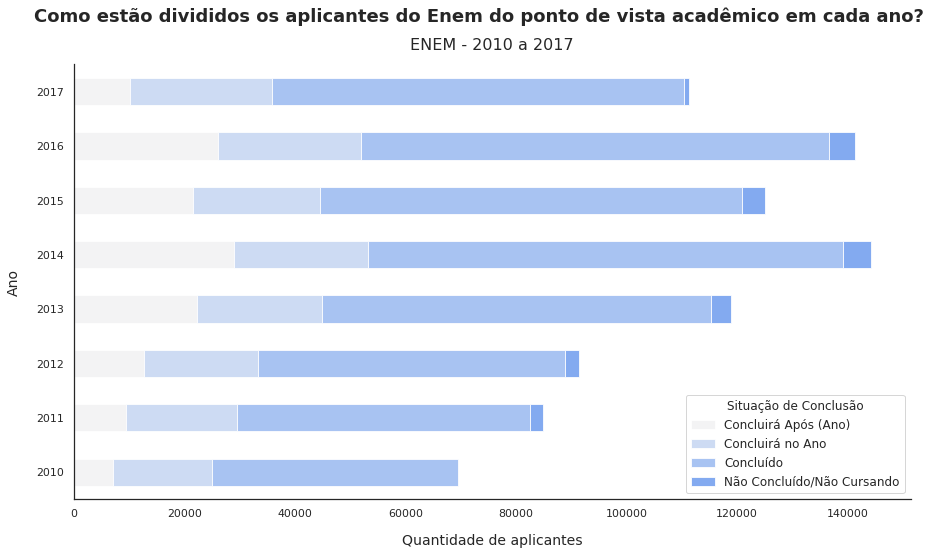

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Ocultar as bordas do gráfico exceto a dos eixos x e y
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Ajustando a identidade visual dos gráficos
sns.set_palette("light:#6495ed", 4)

# Plotando o gráfico de barras empilhadas e ajustando a legenda
ax = enem_aplicantes.plot(kind='barh', stacked = True, figsize= (15, 8), alpha  = 0.8)
ax.legend(title='Situação de Conclusão', title_fontsize  = 12, fontsize = 12)

# Adicionando título e subtítulo em nosso gráfico
plt.suptitle("Como estão divididos os aplicantes do Enem do ponto de vista acadêmico em cada ano?", size = 18, weight='bold')
plt.title("ENEM - 2010 a 2017", fontsize = 16, pad = 15)
plt.ylabel("Ano", fontsize = 14, labelpad = 15)
plt.xlabel("Quantidade de aplicantes", fontsize = 14, labelpad = 15)

# Oculta as informações no topo do gráfico
plt.show()

<font color=green size=4> Observações e hipóteses: </font>

---
Através do gráfico de barras empilhadas, podemos observar as relações **absolutas** (quantidade aplicantes por ano) e **relativas** (situações de conclusão) das(os) aplicantes do Enem dentro do período de 2010 a 2017. Podemos notar que a situação *Concluído* apresenta uma predominância nos nossos dados em cada ano.

Entretanto, o gráfico mais adequado para saber a relação entre as situações e a proporção delas, em cada ano, é o gráfico de barras 100% empilhadas, que veremos mais abaixo.

#### Barras 100% empilhadas

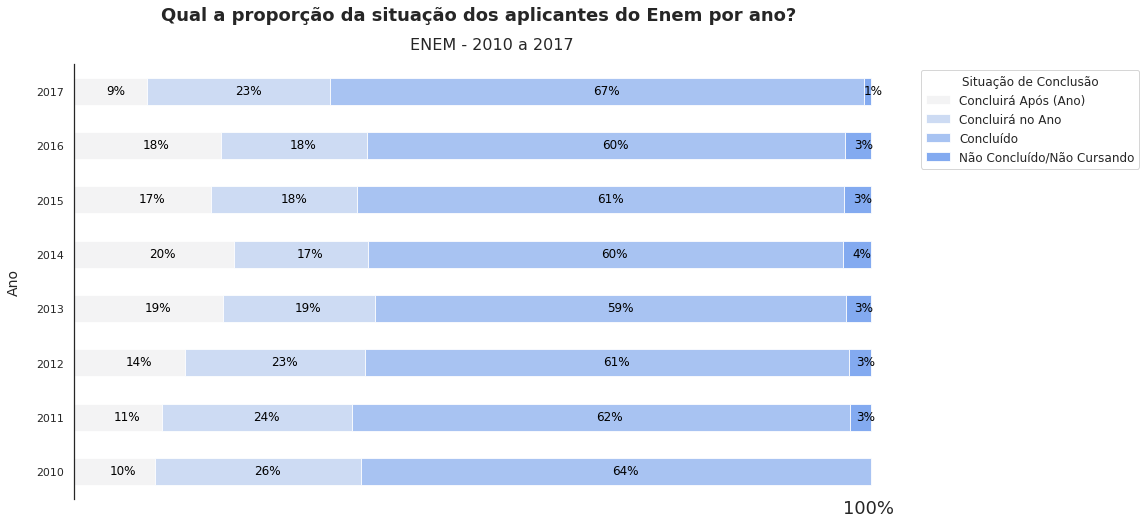

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Ocultar as bordas do gráfico exceto a dos eixos y
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "axes.spines.bottom": False}

# Tema mais limpo para a visualização com os parâmetros previamente descritos
sns.set_theme(context="notebook", style="white", rc=custom_params)

# Ajustando a identidade visual dos gráficos
sns.set_palette("light:#6495ed", 4)

# Criando uma tabela cruzada com a proporção de cada situação separada por ano
enem_aplicantes_prop = pd.crosstab(index=enem_situacao["ANO"], columns=enem_situacao['SITUACAO_CONCLUSAO'],
                                   normalize="index")

# Plotando o gráfico de barras 100% empilhadas e ajustando a legenda
ax = enem_aplicantes_prop.plot(kind='barh', stacked=True, figsize= (15, 8), alpha  = 0.8)
ax.legend(bbox_to_anchor=(1.005, 1), title='Situação de Conclusão', title_fontsize  = 12, fontsize = 12)
ax.set_xticklabels([])

# Adicionando título e subtítulo em nosso gráfico
plt.suptitle("Qual a proporção da situação dos aplicantes do Enem por ano?", size = 18, weight='bold')
plt.title("ENEM - 2010 a 2017", fontsize = 16, pad = 15)
plt.ylabel("Ano", fontsize = 14, labelpad = 15)
plt.xlabel("100%", fontsize = 18, labelpad = 15)

# Ajustando a posição do '100%' no eixo x
ax.xaxis.set_label_coords(0.95, 0)

# Adicionando as porcentagens em cada barra
for pos, valor in enumerate([*enem_aplicantes.index.values]):
    for (proporcao, count, pos_y) in zip(enem_aplicantes_prop.loc[valor],
                                          enem_aplicantes.loc[valor],
                                          enem_aplicantes_prop.loc[valor].cumsum()):
      if(count != 0):
        plt.text(x = (pos_y - proporcao) + (proporcao / 2) - 0.005,
                y = pos - 0.05,
                s = f'{(proporcao * 100):.0f}%',
                color="black", fontsize=12)

<font color=green size=4> Observações e hipóteses: </font>

---

Agora, com o gráfico de barras 100% empilhadas, o que é destacado em nossos dados são as **proporções relativas** em cada ano.

É possível notar que salvo o ano de 2013, em todos os anos, **60% ou mais das(os) aplicantes** já haviam concluído o Ensino Médio na época das avaliações do Enem.

2010, ano de início do Enem com acesso ao SISU (Sistema de Seleção Unificada), não apresenta dados para aplicantes com a condição de *Não Concluído/Não cursando*.



---

## Links Úteis

*   [Infogram | Como escolher o gráfico certo para seus dados?](https://infogram.com/pt/pagina/escolha-grafico-de-visualizacoes-certo)
*   [Biuwer | Como escolher o melhor gráfico para os seus dados? (em inglês e espanhol)](https://biuwer.com/en/blog/how-to-choose-the-right-chart-for-your-data/)
*   [Data Viz Project | Coleção de visualizações de dados (em inglês)](https://datavizproject.com/)
*   [From data to Viz | Ache o gráfico que precisa (em inglês)](https://www.data-to-viz.com/)
*   [O Catálogo de Visualização de Dados (em inglês, espanhol e outras línguas)](https://datavizcatalogue.com/index.html)
*   [DisplayR Blog | O que é Overplotting? (em inglês)](https://www.displayr.com/what-is-overplotting/)

